In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm

PIMA diabetes dataset from kaggle

In [2]:
#loading the diabetes dataset to a pandas data frame
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

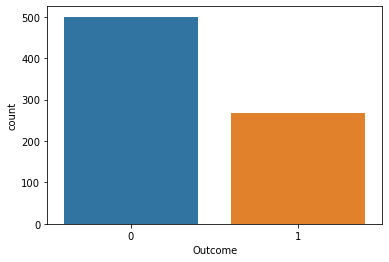

In [6]:
sns.countplot(x="Outcome",data= diabetes_dataset)

In [7]:
diabetes_dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
#Data Cleaning
diabetes_dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
diabetes_dataset ['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_dataset.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [11]:
x=diabetes_dataset.drop(columns='Outcome',axis=1)
y=diabetes_dataset['Outcome']
print(x)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


Data Standardization

In [12]:
scaler=StandardScaler()
scaler.fit(x)

StandardScaler()

In [13]:
standardized_data=scaler.transform(x)
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [14]:
x= standardized_data
y=diabetes_dataset['Outcome']

 Train test Split

In [15]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [16]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [17]:
print(x)
print(y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [18]:
x_train

array([[ 0.93691372,  2.35058677,  1.08020025, ...,  0.99091209,
        -0.06304891,  0.66020563],
       [-0.54791859, -1.24858494,  0.14964075, ..., -0.24020459,
         0.22688248, -0.70119842],
       [-0.54791859,  0.19108374, -0.57412775, ..., -0.54481078,
         3.40706745, -0.70119842],
       ...,
       [-0.25095213, -1.2172878 ,  0.04624525, ..., -1.3824778 ,
        -0.25029627, -0.70119842],
       [ 0.93691372, -0.56004775, -0.16054575, ...,  0.90206862,
        -0.38620161, -0.19067191],
       [-1.14185152,  1.25518668, -0.98770975, ..., -1.2809424 ,
        -0.65801229,  2.7023117 ]])

In [19]:
classifier = svm.SVC(kernel='linear')

Trainig the svm classifier

In [20]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

 Evaluation of model-
 Accuracy score

In [21]:
x_train_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)

In [22]:
print('Accuracy score is: ',training_data_accuracy)

Accuracy score is:  0.7801302931596091


In [23]:
x_test_prediction=classifier.predict(x_test)
testing_data_accuracy=accuracy_score(x_test_prediction, y_test)
print('Accuracy score of testing data is: ', testing_data_accuracy)

Accuracy score of testing data is:  0.7792207792207793


KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=25, metric='minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [25]:
#predicting
knn_y_predict=knn.predict(x_test)

In [26]:
knn_y_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
      dtype=int64)

Confusion Matrix

<AxesSubplot:>

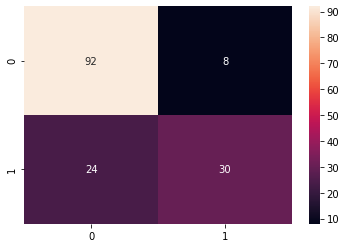

In [27]:
from sklearn.metrics import confusion_matrix
knn_cn=confusion_matrix(y_test, knn_y_predict)
sns.heatmap(knn_cn,annot=True)

In [28]:
print('correct: ',sum(knn_y_predict==y_test))
print("Incorrect: ",sum(knn_y_predict!=y_test))
print("Accuracy: ",sum(knn_y_predict==y_test)/len(knn_y_predict))

correct:  122
Incorrect:  32
Accuracy:  0.7922077922077922


In [29]:
#verifying accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,knn_y_predict)

0.7922077922077922

# Making a Predictive System

In [30]:
input_data=(1,103,30,38,83,43.3,0.183,33)

#changing the input data to numpy array
input_data_as_numpy=np.asarray(input_data)
#reshapping the array
input_data_reshapped = input_data_as_numpy.reshape(1,-1)
standard_data=scaler.transform(input_data_reshapped)
print(standard_data)
prediction=knn.predict(standard_data)
print(prediction)

if prediction[0]==0:
    print("The patient is not diabetic!")
else:
    print("The person is Diabetic")


[[-0.84488505 -0.56004775 -2.02166474  1.09545411  0.02778979  1.43512945
  -0.87244072 -0.0204964 ]]
[0]
The patient is not diabetic!
